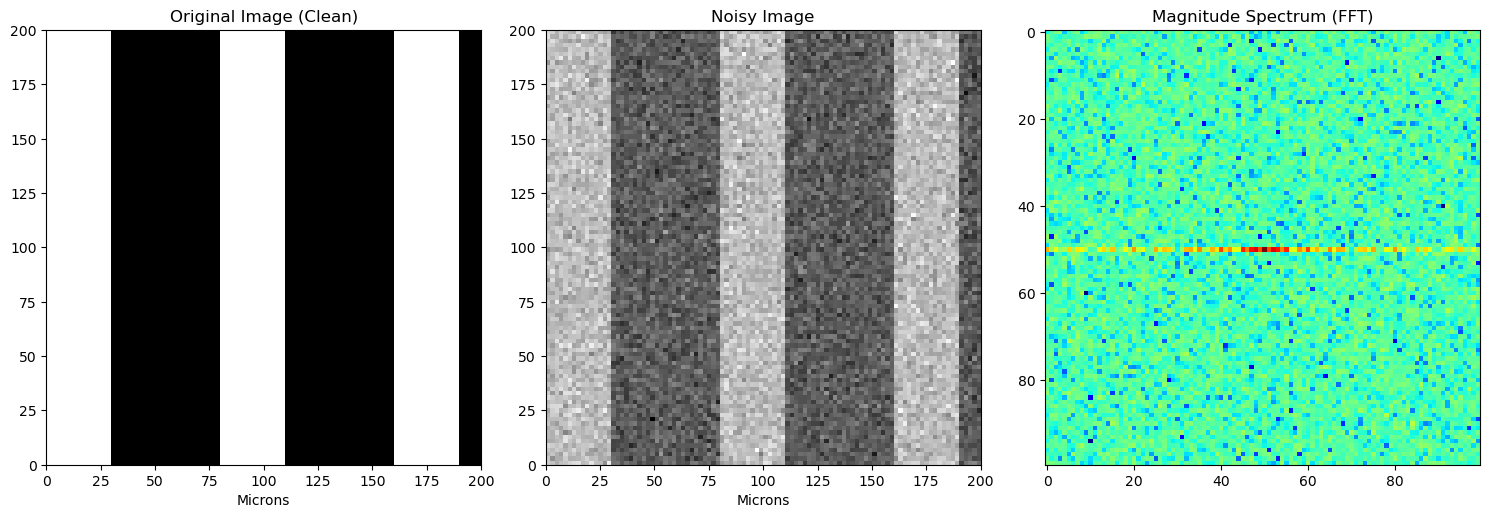

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. กำหนดพารามิเตอร์ ---
N = 100       # จำนวนพิกเซล
L = 200         # ขนาดพื้นที่จริง 200 ไมครอน
width_bright = 30
width_dark = 50
period = width_bright + width_dark 

# --- 2. สร้าง Grid ---
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# --- 3. สร้าง Pattern (ภาพต้นฉบับ) ---
pattern_mask = (X % period) < width_bright
img = np.zeros((N, N))        
img[pattern_mask] = 10000
img[~pattern_mask] = 500

# --- 4. เติม Noise ---
noise_level = 2000
noise = np.random.normal(0, noise_level, img.shape)
img_noisy = img + noise

# --- 5. FFT ---
f = np.fft.fft2(img_noisy)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# --- 6. แสดงผล (ปรับแก้ส่วนนี้) ---

# ปรับขนาดรูปให้กว้างขึ้น (15, 5) เพื่อให้วาง 3 รูปได้สวยๆ
plt.figure(figsize=(15, 5))

# รูปที่ 1: ภาพต้นฉบับ (Original)
plt.subplot(131)
plt.imshow(img, cmap='gray', extent=[0, L, 0, L])
plt.title('Original Image (Clean)')
plt.xlabel('Microns')

# รูปที่ 2: ภาพที่เติม Noise แล้ว
plt.subplot(132)
plt.imshow(img_noisy, cmap='gray', extent=[0, L, 0, L])
plt.title('Noisy Image')
plt.xlabel('Microns')

# รูปที่ 3: Spectrum (FFT)
plt.subplot(133)
# ใช้ cmap='jet' หรือ 'inferno' จะเห็นความเข้มข้นของความถี่ชัดกว่า gray
plt.imshow(magnitude_spectrum, cmap='jet') 
plt.title('Magnitude Spectrum (FFT)')

plt.tight_layout()
plt.show()